In [117]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
%matplotlib inline
from prophet import Prophet

In [118]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [119]:
data = pd.read_csv('world_real_estate_data(147k).csv')

In [120]:
data

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
0,2 room apartment 120 m² in Mediterranean Regio...,Turkey,"Mediterranean Region, Turkey",NaN,5.0,1.0,3.0,2.0,2.0,120 m²,110 m²,315209.0,https://realting.com/uploads/bigSlider/ab3/888...,https://realting.com/property-for-sale/turkey/...
1,"4 room villa 500 m² in Kalkan, Turkey",Turkey,"Kalkan, Mediterranean Region, Kas, Turkey",2021.0,2.0,NaN,NaN,NaN,NaN,500 m²,480 m²,1108667.0,https://realting.com/uploads/bigSlider/87b/679...,https://realting.com/property-for-sale/turkey/...
2,"1 room apartment 65 m² in Antalya, Turkey",Turkey,"Mediterranean Region, Antalya, Turkey",NaN,5.0,2.0,2.0,1.0,1.0,65 m²,60 m²,173211.0,https://realting.com/uploads/bigSlider/030/a11...,https://realting.com/property-for-sale/turkey/...
3,"1 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2020.0,15.0,5.0,2.0,1.0,1.0,NaN,40 m²,99900.0,https://realting.com/uploads/bigSlider/e9a/e06...,https://realting.com/property-for-sale/thailan...
4,"2 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2026.0,8.0,3.0,3.0,2.0,1.0,NaN,36 m²,67000.0,https://realting.com/uploads/bigSlider/453/aa2...,https://realting.com/property-for-sale/thailan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147531,"5 room apartment 310 m² in Gazipasa, Turkey",Turkey,"Mediterranean Region, Gazipasa, Turkey",NaN,NaN,NaN,NaN,5.0,NaN,310 m²,NaN,597810.0,https://realting.com/uploads/bigSlider/e4a/67f...,https://realting.com/property-for-sale/turkey/...
147532,"4 room apartment 192 m² in Marmara Region, Turkey",Turkey,"Marmara Region, Turkey",2023.0,5.0,NaN,5.0,4.0,2.0,192 m²,151 m²,637195.0,https://realting.com/uploads/bigSlider/93e/5c6...,https://realting.com/property-for-sale/turkey/...
147533,"2 room apartment in Marmara Region, Turkey",Turkey,"Marmara Region, Turkey",NaN,NaN,NaN,3.0,2.0,2.0,NaN,84 m²,477146.0,https://realting.com/uploads/bigSlider/4ae/9d8...,https://realting.com/property-for-sale/turkey/...
147534,"Apartment in Akarca, Turkey",Turkey,"Akarca, Central Anatolia Region, Turkey",2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,819163.0,https://realting.com/uploads/bigSlider/164/7e6...,https://realting.com/property-for-sale/turkey/...


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147536 entries, 0 to 147535
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   title                       147536 non-null  object 
 1   country                     147406 non-null  object 
 2   location                    147405 non-null  object 
 3   building_construction_year  64719 non-null   float64
 4   building_total_floors       68224 non-null   float64
 5   apartment_floor             54592 non-null   float64
 6   apartment_rooms             74178 non-null   float64
 7   apartment_bedrooms          36982 non-null   float64
 8   apartment_bathrooms         55973 non-null   float64
 9   apartment_total_area        141796 non-null  object 
 10  apartment_living_area       27712 non-null   object 
 11  price_in_USD                144961 non-null  float64
 12  image                       147536 non-null  object 
 13  url           

In [122]:
bold = '\033[1m'

In [123]:
print(f'{bold}What are the countries available in the data?')

What are the countries available in the data?


In [124]:
data['country'].unique()

array(['Turkey', 'Thailand', 'Georgia', 'Montenegro', 'Northern Cyprus',
       'Lithuania', 'Belarus', 'UAE', 'Czech Republic', 'Uzbekistan', nan,
       'Greece', 'Serbia', 'Italy', 'Hungary', 'Russia', 'Finland',
       'Poland', 'Austria', 'Spain', 'Latvia', 'Portugal',
       'United States', 'Armenia', 'Croatia', 'Cyprus', 'Australia',
       'Indonesia'], dtype=object)

In [125]:
print(f'{bold}How many are they?')

How many are they?


In [126]:
data['country'].nunique()

27

In [127]:
print(f'{bold}Remove all the NaN values from the data')

Remove all the NaN values from the data


In [128]:
data.dropna(inplace=True)

In [129]:
data

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
6,"4 room apartment 245 m² in Yesiloez, Turkey",Turkey,"Yesiloez, Mediterranean Region, Alanya, Turkey",2007.0,2.0,3.0,5.0,4.0,4.0,245 m²,245 m²,274415.0,https://realting.com/uploads/bigSlider/9c8/6f1...,https://realting.com/property-for-sale/turkey/...
15,"2 room apartment 54 m² in Prague, Czech Republic",Czech Republic,"Prague, Czech Republic",2023.0,4.0,2.0,4.0,2.0,1.0,54 m²,54 m²,314990.0,https://realting.com/uploads/bigSlider/08e/1d5...,https://realting.com/property-for-sale/czech-r...
146,"2 room apartment 93 m² in Alanya, Turkey",Turkey,"Mediterranean Region, Sekerhane Mahallesi, Ala...",2020.0,4.0,4.0,3.0,2.0,1.0,93 m²,75 m²,248071.0,https://realting.com/uploads/bigSlider/638/7b0...,https://realting.com/property-for-sale/turkey/...
156,"1 room apartment 76 m² in Tashkent, Uzbekistan",Uzbekistan,"Tashkent, Chilanzar District, Uzbekistan",2025.0,11.0,8.0,2.0,1.0,1.0,76 m²,44 m²,90021.0,https://realting.com/uploads/bigSlider/276/011...,https://realting.com/uzbekistan/property/1717476
229,Multilevel apartments 3 bedrooms 220 m² in Kar...,Turkey,"Karakocali, Mediterranean Region, Alanya, Turkey",2013.0,4.0,4.0,1.0,3.0,3.0,220 m²,216 m²,338143.0,https://realting.com/uploads/bigSlider/50e/f75...,https://realting.com/property-for-sale/turkey/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147408,"2 room apartment 60 m² in Ungasan, Indonesia",Indonesia,"Ungasan, Kuta Selatan, Indonesia",2025.0,4.0,4.0,3.0,2.0,2.0,60 m²,60 m²,121800.0,https://realting.com/uploads/bigSlider/c4f/422...,https://realting.com/property-for-sale/indones...
147411,"2 room apartment 88 m² in Bali, Indonesia",Indonesia,"Bali, Indonesia",2024.0,4.0,4.0,2.0,2.0,2.0,88 m²,78 m²,180000.0,https://realting.com/uploads/bigSlider/f64/c1a...,https://realting.com/property-for-sale/indones...
147415,"2 room apartment 162 m² in Canggu, Indonesia",Indonesia,"Canggu, West Nusa Tenggara, Kec Ampenan, Indon...",2023.0,4.0,1.0,2.0,2.0,2.0,162 m²,162 m²,650000.0,https://realting.com/uploads/bigSlider/b17/bbc...,https://realting.com/property-for-sale/indones...
147422,"2 room apartment 204 m² in Sanur, Indonesia",Indonesia,"Sanur, Denpasar, Indonesia",2024.0,4.0,2.0,2.0,2.0,2.0,204 m²,204 m²,730000.0,https://realting.com/uploads/bigSlider/73a/9e6...,https://realting.com/property-for-sale/indones...


In [130]:
print(f'{bold}How many countries are there now?')

How many countries are there now?


In [131]:
data['country'].unique()

array(['Turkey', 'Czech Republic', 'Uzbekistan', 'Montenegro', 'Italy',
       'Greece', 'Hungary', 'Finland', 'Russia', 'Lithuania', 'Belarus',
       'Spain', 'Latvia', 'Croatia', 'Georgia', 'Poland', 'UAE',
       'Thailand', 'Portugal', 'Northern Cyprus', 'Cyprus', 'Australia',
       'Indonesia'], dtype=object)

In [132]:
data['country'].nunique()

23

In [133]:
print(f'{bold}Which country has the highest total price of apartment?')

Which country has the highest total price of apartment?


In [134]:
country_totals = data.groupby('country')['price_in_USD'].sum().reset_index()

In [135]:
country_totals

,country,price_in_USD
0,Australia,559000.0
1,Belarus,12127461.0
2,Croatia,1023259.0
3,Cyprus,3190860.0
4,Czech Republic,979034.0
5,Finland,344096.0
6,Georgia,40668366.0
7,Greece,3266425.0
8,Hungary,744471.0
9,Indonesia,5863514.0


In [136]:
country_totals.loc[country_totals['price_in_USD'].idxmax()]

country              Turkey
price_in_USD    154585163.0
Name: 20, dtype: object

In [137]:
tur = data[data['country']=='Turkey']

In [138]:
print(f'{bold}Describe the data of Turkey')

Describe the data of Turkey


In [139]:
tur.describe()

,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,price_in_USD
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,6.220000e+02
mean,2013.659164,8.281350,3.749196,3.053055,2.183280,1.660772,2.485292e+05
std,114.515037,6.232191,3.804581,1.141551,1.030224,0.717195,3.081964e+05
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.598500e+04
25%,2020.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.186142e+05
50%,2023.000000,6.000000,2.000000,3.000000,2.000000,2.000000,1.815170e+05
75%,2024.000000,11.000000,5.000000,4.000000,3.000000,2.000000,2.833525e+05
max,2026.000000,46.000000,27.000000,8.000000,6.000000,6.000000,5.277036e+06


In [140]:
print(f'{bold}What is the total price of all the apartments in Turkey?')

What is the total price of all the apartments in Turkey?


In [141]:
tur = data[data['country']=='Turkey']

In [142]:
tur

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
6,"4 room apartment 245 m² in Yesiloez, Turkey",Turkey,"Yesiloez, Mediterranean Region, Alanya, Turkey",2007.0,2.0,3.0,5.0,4.0,4.0,245 m²,245 m²,274415.0,https://realting.com/uploads/bigSlider/9c8/6f1...,https://realting.com/property-for-sale/turkey/...
146,"2 room apartment 93 m² in Alanya, Turkey",Turkey,"Mediterranean Region, Sekerhane Mahallesi, Ala...",2020.0,4.0,4.0,3.0,2.0,1.0,93 m²,75 m²,248071.0,https://realting.com/uploads/bigSlider/638/7b0...,https://realting.com/property-for-sale/turkey/...
229,Multilevel apartments 3 bedrooms 220 m² in Kar...,Turkey,"Karakocali, Mediterranean Region, Alanya, Turkey",2013.0,4.0,4.0,1.0,3.0,3.0,220 m²,216 m²,338143.0,https://realting.com/uploads/bigSlider/50e/f75...,https://realting.com/property-for-sale/turkey/...
280,"Penthouse 4 bedrooms 210 m² in Antalya, Turkey",Turkey,"Mediterranean Region, Antalya, Turkey",2019.0,7.0,7.0,5.0,4.0,2.0,210 m²,195 m²,368469.0,https://realting.com/uploads/bigSlider/5c9/55e...,https://realting.com/property-for-sale/turkey/...
283,"3 room apartment 140 m² in Karakocali, Turkey",Turkey,"Karakocali, Mediterranean Region, Alanya, Turkey",2015.0,4.0,1.0,1.0,3.0,2.0,140 m²,135 m²,299461.0,https://realting.com/uploads/bigSlider/d25/41f...,https://realting.com/property-for-sale/turkey/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144332,"Penthouse 4 bedrooms 140 m² in Karakocali, Turkey",Turkey,"Karakocali, Mediterranean Region, Alanya, Turkey",2024.0,5.0,5.0,5.0,4.0,2.0,140 m²,126 m²,375978.0,https://realting.com/uploads/bigSlider/3ea/7d0...,https://realting.com/property-for-sale/turkey/...
144436,"2 room apartment 100 m² in Yalinayak, Turkey",Turkey,"Yalinayak, Toroslar, Mediterranean Region, Turkey",2022.0,11.0,7.0,3.0,2.0,2.0,100 m²,85 m²,99997.0,https://realting.com/uploads/bigSlider/041/f4a...,https://realting.com/property-for-sale/turkey/...
144570,"1 room apartment 60 m² in Fethiye, Turkey",Turkey,"Aegean Region, Fethiye, Turkey",2023.0,3.0,2.0,2.0,1.0,1.0,60 m²,55 m²,228255.0,https://realting.com/uploads/bigSlider/6fe/905...,https://realting.com/property-for-sale/turkey/...
144739,"3 room apartment 190 m² in Elvanli, Turkey",Turkey,"Elvanli, Mediterranean Region, Mersin, Turkey",2014.0,12.0,5.0,4.0,3.0,2.0,190 m²,172 m²,231707.0,https://realting.com/uploads/bigSlider/785/38e...,https://realting.com/property-for-sale/turkey/...


In [143]:
tur_price = tur['price_in_USD'].sum()

In [144]:
tur_price

154585163.0

In [145]:
print(f'{bold}How many apartments are in Turkey?')

How many apartments are in Turkey?


In [146]:
tur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 6 to 146241
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       622 non-null    object 
 1   country                     622 non-null    object 
 2   location                    622 non-null    object 
 3   building_construction_year  622 non-null    float64
 4   building_total_floors       622 non-null    float64
 5   apartment_floor             622 non-null    float64
 6   apartment_rooms             622 non-null    float64
 7   apartment_bedrooms          622 non-null    float64
 8   apartment_bathrooms         622 non-null    float64
 9   apartment_total_area        622 non-null    object 
 10  apartment_living_area       622 non-null    object 
 11  price_in_USD                622 non-null    float64
 12  image                       622 non-null    object 
 13  url                         622 

In [147]:
print('There are 622 apartments in Turkey')

There are 622 apartments in Turkey


In [148]:
print(f'{bold}What factor affects the price of apartments in Turkey the most?')

What factor affects the price of apartments in Turkey the most?


In [149]:
tur.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_4520\388012249.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,price_in_USD
building_construction_year,1.000000,-0.091917,-0.081813,0.019959,0.053941,0.049254,0.035637
building_total_floors,-0.091917,1.000000,0.560217,-0.076117,-0.106109,-0.049946,0.055392
apartment_floor,-0.081813,0.560217,1.000000,0.106885,0.111169,0.161159,0.221168
apartment_rooms,0.019959,-0.076117,0.106885,1.000000,0.885836,0.645516,0.344939
apartment_bedrooms,0.053941,-0.106109,0.111169,0.885836,1.000000,0.727209,0.372295
apartment_bathrooms,0.049254,-0.049946,0.161159,0.645516,0.727209,1.000000,0.365920
price_in_USD,0.035637,0.055392,0.221168,0.344939,0.372295,0.365920,1.000000


In [150]:
print(f'{bold}This shows how factors affects each other. '
     'Correlation value -1 means when one variable increases, the other decreases in a perfectly linear fashion.'
     'Correlation value between -1 and -0.7 means a strong negative relationship, but not perfect. As one variable increases, the other tends to decrease significantly. '
     'Correlation value between -0.7 and -0.3 means a moderate negative relationship. As one variable increases, the other tends to decrease, but the relationship is not very strong. '
     'Correlation value between -0.3 and 0 means a weak negative relationship. There is a slight tendency for one variable to decrease as the other increases. Correltion value between 0 and 0.3 means a weak positive relationship. There is slight tendency for one variable to increase as the other increases. Correlation values between 0.3 and 0.7 means a moderate positive relationship. As one variable increases, the other tends to increase, but the relationship is not very strong. '
     'Correlation value between 0.7 and 1 indicates a strong positive relationship, but not perfect. As one variable increases the other tends to increase significantly. '
     'Correlation value of 1 means when one variable increases the other increases in a perfectly linear fashion. Correlation value of 0 indicates no relationship between the two variables. ')



This shows how factors affects each other. Correlation value -1 means when one variable increases, the other decreases in a perfectly linear fashion.Correlation value between -1 and -0.7 means a strong negative relationship, but not perfect. As one variable increases, the other tends to decrease significantly. Correlation value between -0.7 and -0.3 means a moderate negative relationship. As one variable increases, the other tends to decrease, but the relationship is not very strong. Correlation value between -0.3 and 0 means a weak negative relationship. There is a slight tendency for one variable to decrease as the other increases. Correltion value between 0 and 0.3 means a weak positive relationship. There is slight tendency for one variable to increase as the other increases. Correlation values between 0.3 and 0.7 means a moderate positive relationship. As one variable increases, the other tends to increase, but the relationship is not very strong. Correlation value between 0.7 and

In [151]:
print(f'{bold}What affects the price of apartments the most in Turkey apart from the price itself is the number of the apartment bedrooms having a correlation value of 0.372295')

What affects the price of apartments the most in Turkey apart from the price itself is the number of the apartment bedrooms having a correlation value of 0.372295


C:\Users\USER\AppData\Local\Temp\ipykernel_4520\3354514647.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

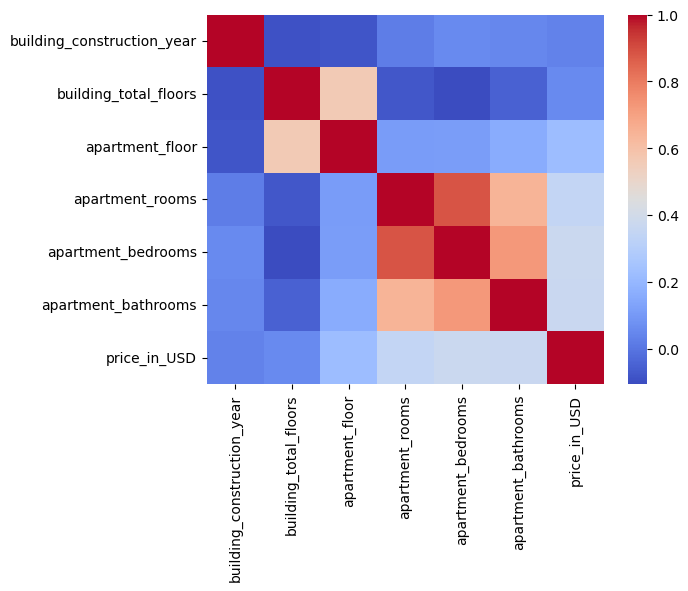

In [152]:
sns.heatmap(tur.corr(),cmap='coolwarm')

In [153]:
print(f'{bold}What is the total number of apartments floors in Turkey?')

What is the total number of apartments floors in Turkey?


In [154]:
tur['apartment_floor'].sum()

2332.0

In [155]:
print(f'{bold}Forecast what the total price of apartment may be for the next 5 years in Turkey')

Forecast what the total price of apartment may be for the next 5 years in Turkey


In [156]:
turp = tur.groupby('building_construction_year')['price_in_USD'].sum().reset_index()

In [157]:
turp

,building_construction_year,price_in_USD
0,5.0,80168.0
1,1910.0,509769.0
2,1913.0,163039.0
3,1967.0,368469.0
4,1975.0,189126.0
5,1984.0,103802.0
6,1987.0,217386.0
7,1990.0,179343.0
8,1993.0,1377138.0
9,1995.0,155431.0


In [158]:
new_dates = ['1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
             '2000',
             '2001','2002','2003',
            '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017',
            '2018','2019','2020','2021','2022','2023']

In [159]:
turp['building_construction_year'] = new_dates

In [160]:
turp

,building_construction_year,price_in_USD
0,1985,80168.0
1,1986,509769.0
2,1987,163039.0
3,1988,368469.0
4,1989,189126.0
5,1990,103802.0
6,1991,217386.0
7,1992,179343.0
8,1993,1377138.0
9,1994,155431.0


In [161]:
turp.rename(columns={'building_construction_year':'ds','price_in_USD':'y'},inplace=True)

In [162]:
model = Prophet()

In [163]:
model.fit(turp)

10:55:55 - cmdstanpy - INFO - Chain [1] start processing
10:55:55 - cmdstanpy - INFO - Chain [1] done processing


In [164]:
future = model.make_future_dataframe(periods=6,freq='A')

In [165]:
forecast = model.predict(future)

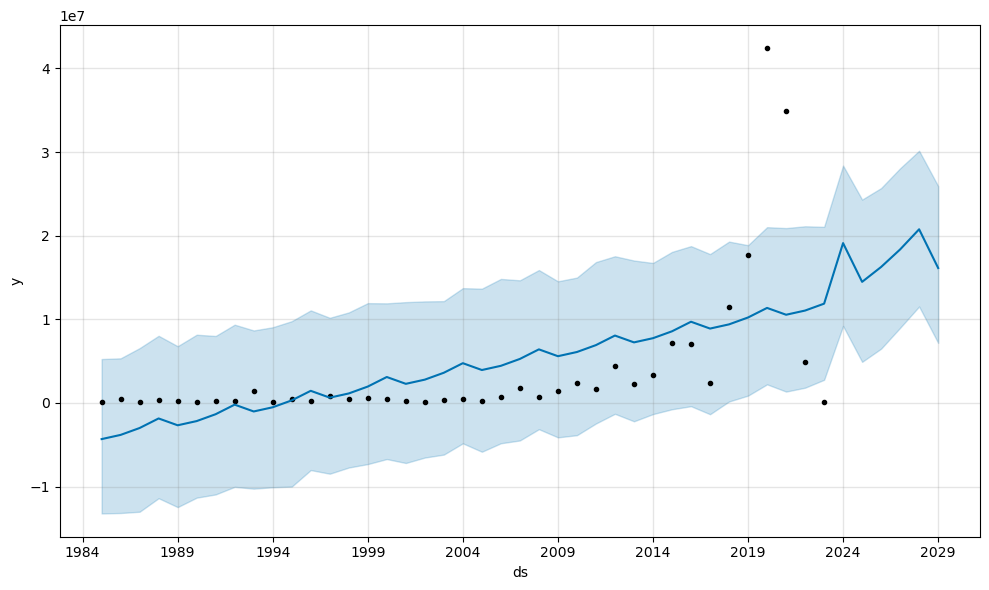

In [166]:
fig = model.plot(forecast)

In [167]:
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail(5)

,ds,yhat,yhat_upper,yhat_lower
40,2024-12-31,1.448232e+07,2.432064e+07,4.915844e+06
41,2025-12-31,1.626308e+07,2.569698e+07,6.494758e+06
42,2026-12-31,1.835941e+07,2.806182e+07,8.986746e+06
43,2027-12-31,2.076862e+07,3.015837e+07,1.153402e+07
44,2028-12-31,1.613446e+07,2.593004e+07,7.177767e+06


In [168]:
print(f'{bold}The forecasted price of apartment for the next five years in Turkey is the yhat column from '
     '1444482320 to 16134460')

The forecasted price of apartment for the next five years in Turkey is the yhat column from 1444482320 to 16134460


In [169]:
print(f'{bold}Plot a geographical map showing the total price in USD of apartment for each country in the data set')

Plot a geographical map showing the total price in USD of apartment for each country in the data set


In [170]:
country_totals

,country,price_in_USD
0,Australia,559000.0
1,Belarus,12127461.0
2,Croatia,1023259.0
3,Cyprus,3190860.0
4,Czech Republic,979034.0
5,Finland,344096.0
6,Georgia,40668366.0
7,Greece,3266425.0
8,Hungary,744471.0
9,Indonesia,5863514.0


In [186]:
datap = dict(type='choropleth',
            z = country_totals['price_in_USD'],
            locations = country_totals['country'],
            text = country_totals['country'],
            colorbar = {'title':'Total Price Of Apartments In USD'})

In [187]:
layout = dict(title = 'Total Price Of Apartments In USD',
             geo = dict(showframe = False, projection = {'type':'satellite'}))

In [188]:
choromap = go.Figure(data=[datap],layout=layout)

In [189]:
iplot(choromap)